In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"
tf_device = '/gpu:2'

In [3]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from uncertainty_from_distance import uncertainty_from_distances
import matplotlib.pyplot as plt
from sampling_unc import sample_uniform
from attack import attack_fn
from sampling_unc import sample_high_unc
from scipy import stats

/home/interns2022/miniconda3/envs/sarthak/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
(ds_train, ds_test), ds_info = tfds.load(
    'cifar100',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(16)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(16)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

2022-06-27 14:13:43.150607: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-27 14:13:43.785208: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30975 MB memory:  -> device: 0, name: NVIDIA Tesla V100-DGXS-32GB, pci bus id: 0000:0f:00.0, compute capability: 7.0


In [5]:

new_model = tf.keras.models.load_model('cifar100_resnet20.pb')

def model(input):
    input = tf.transpose(input, perm = [0, 3, 1, 2])
    output = new_model(test_input = input)['test_output']
    return tf.nn.softmax(output)

In [6]:
distance_obj = uncertainty_from_distances(model, 16, 20, 32, 3)

2022-06-27 14:13:46.899558: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-06-27 14:13:47.362838: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


17
33
49
65


81


97
113
129
145
161
177
193
209
225
241
257
273
289
305
321
337
353
369
385
401
417
433
449
465
481
497
513
529
545
561
577
593
609
625
641
657
673
689
705
721
737
753
769
785
801
817
833
849
865
881
897
913
929
945
961
977
993
1009
1025
1041
1057
1073
1089
1105
1121
1137
1153
1169
1185
1201
1217
1233
1249
1265
1281
1297
1313
1329
1345
1361
1377
1393
1409
1425
1441
1457
1473
1489
1505
1521
1537
1553
1569
1585
1601
1617
1633
1649
1665
1681
1697
1713
1729
1745
1761
1777
1793
1809
1825
1841
1857
1873
1889
1905
1921
1937
1953
1969
1985
2001
2017
2033
2049
2065
2081
2097
2113
2129
2145
2161
2177
2193
2209
2225
2241
2257
2273
2289
2305
2321
2337
2353
2369
2385
2401
2417
2433
2449
2465
2481
2497
2513
2529
2545
2561
2577
2593
2609
2625
2641
2657
2673
2689
2705
2721
2737
2753
2769
2785
2801
2817
2833
2849
2865
2881
2897
2913
2929
2945
2961
2977
2993
3009
3025
3041
3057
3073
3089
3105
3121
3137
3153
3169
3185
3201
3217
3233
3249
3265
3281
3297
3313
3329
3345
3361
3377
3393
3409
3425
3441
3457
347

23761
23777
23793
23809
23825
23841
23857
23873
23889
23905
23921
23937
23953
23969
23985
24001
24017
24033
24049
24065
24081
24097
24113
24129
24145
24161
24177
24193
24209
24225
24241
24257
24273
24289
24305
24321
24337
24353
24369
24385
24401
24417
24433
24449
24465
24481
24497
24513
24529
24545
24561
24577
24593
24609
24625
24641
24657
24673
24689
24705
24721
24737
24753
24769
24785
24801
24817
24833
24849
24865
24881
24897
24913
24929
24945
24961
24977
24993
25009
25025
25041
25057
25073
25089
25105
25121
25137
25153
25169
25185
25201
25217
25233
25249
25265
25281
25297
25313
25329
25345
25361
25377
25393
25409
25425
25441
25457
25473
25489
25505
25521
25537
25553
25569
25585
25601
25617
25633
25649
25665
25681
25697
25713
25729
25745
25761
25777
25793
25809
25825
25841
25857
25873
25889
25905
25921
25937
25953
25969
25985
26001
26017
26033
26049
26065
26081
26097
26113
26129
26145
26161
26177
26193
26209
26225
26241
26257
26273
26289
26305
26321
26337
26353
26369
26385
26401
2641

45617
45633
45649
45665
45681
45697
45713
45729
45745
45761
45777
45793
45809
45825
45841
45857
45873
45889
45905
45921
45937
45953
45969
45985
46001
46017
46033
46049
46065
46081
46097
46113
46129
46145
46161
46177
46193
46209
46225
46241
46257
46273
46289
46305
46321
46337
46353
46369
46385
46401
46417
46433
46449
46465
46481
46497
46513
46529
46545
46561
46577
46593
46609
46625
46641
46657
46673
46689
46705
46721
46737
46753
46769
46785
46801
46817
46833
46849
46865
46881
46897
46913
46929
46945
46961
46977
46993
47009
47025
47041
47057
47073
47089
47105
47121
47137
47153
47169
47185
47201
47217
47233
47249
47265
47281
47297
47313
47329
47345
47361
47377
47393
47409
47425
47441
47457
47473
47489
47505
47521
47537
47553
47569
47585
47601
47617
47633
47649
47665
47681
47697
47713
47729
47745
47761
47777
47793
47809
47825
47841
47857
47873
47889
47905
47921
47937
47953
47969
47985
48001
48017
48033
48049
48065
48081
48097
48113
48129
48145
48161
48177
48193
48209
48225
48241
48257
4827

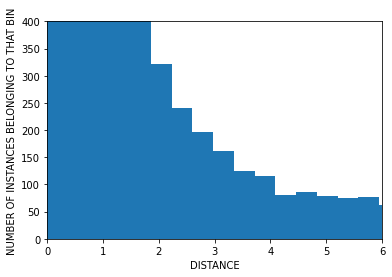

<Figure size 432x288 with 0 Axes>

In [7]:

uncertainty_distance_1 = np.array([0])

for imgs, labels in ds_train:
    uncertainty_distance_1 = np.append(uncertainty_distance_1, tf.make_ndarray(tf.make_tensor_proto(distance_obj.get_uncertainty(imgs))), axis = 0)
    print(len(uncertainty_distance_1))

uncertainty_distance_1 = uncertainty_distance_1[np.isfinite(uncertainty_distance_1)]
plt.hist(uncertainty_distance_1, bins = 1000)
plt.xlabel('DISTANCE')
plt.ylabel('NUMBER OF INSTANCES BELONGING TO THAT BIN')
plt.xlim(0, 6)
plt.ylim(0, 400)
plt.show()
plt.savefig('cifar100_train_unc_distance_1.png')


In [ ]:
plt.hist(uncertainty_distance_1, bins = 100000)
plt.xlabel('DISTANCE')
plt.ylabel('NUMBER OF INSTANCES BELONGING TO THAT BIN')
plt.xlim(0, 2)
plt.ylim(0, 5000)
plt.show()
plt.savefig('cifar100_train_unc_distance_1.png')

17
33
49
65
81
97
113
129
145
161
177
193
209
225
241
257
273
289
305
321
337
353
369
385
401
417
433
449
465
481
497
513
529
545
561
577
593
609
625
641
657
673
689
705
721
737
753
769
785
801
817
833
849
865
881
897
913
929
945
961
977
993
1009
1025
1041
1057
1073
1089
1105
1121
1137
1153
1169
1185
1201
1217
1233
1249
1265
1281
1297
1313
1329
1345
1361
1377
1393
1409
1425
1441
1457
1473
1489
1505
1521
1537
1553
1569
1585
1601
1617
1633
1649
1665
1681
1697
1713
1729
1745
1761
1777
1793
1809
1825
1841
1857
1873
1889
1905
1921
1937
1953
1969
1985
2001
2017
2033
2049
2065
2081
2097
2113
2129
2145
2161
2177
2193
2209
2225
2241
2257
2273
2289
2305
2321
2337
2353
2369
2385
2401
2417
2433
2449
2465
2481
2497
2513
2529
2545
2561
2577
2593
2609
2625
2641
2657
2673
2689
2705
2721
2737
2753
2769
2785
2801
2817
2833
2849
2865
2881
2897
2913
2929
2945
2961
2977
2993
3009
3025
3041
3057
3073
3089
3105
3121
3137
3153
3169
3185
3201
3217
3233
3249
3265
3281
3297
3313
3329
3345
3361
3377
3393
3409
342

23713
23729
23745
23761
23777
23793
23809
23825
23841
23857
23873
23889
23905
23921
23937
23953
23969
23985
24001
24017
24033
24049
24065
24081
24097
24113
24129
24145
24161
24177
24193
24209
24225
24241
24257
24273
24289
24305
24321
24337
24353
24369
24385
24401
24417
24433
24449
24465
24481
24497
24513
24529
24545
24561
24577
24593
24609
24625
24641
24657
24673
24689
24705
24721
24737
24753
24769
24785
24801
24817
24833
24849
24865
24881
24897
24913
24929
24945
24961
24977
24993
25009
25025
25041
25057
25073
25089
25105
25121
25137
25153
25169
25185
25201
25217
25233
25249
25265
25281
25297
25313
25329
25345
25361
25377
25393
25409
25425
25441
25457
25473
25489
25505
25521
25537
25553
25569
25585
25601
25617
25633
25649
25665
25681
25697
25713
25729
25745
25761
25777
25793
25809
25825
25841
25857
25873
25889
25905
25921
25937
25953
25969
25985
26001
26017
26033
26049
26065
26081
26097
26113
26129
26145
26161
26177
26193
26209
26225
26241
26257
26273
26289
26305
26321
26337
26353
2636

45569
45585
45601
45617
45633
45649
45665
45681
45697
45713
45729
45745
45761
45777
45793
45809
45825
45841
45857
45873
45889
45905
45921
45937
45953
45969
45985
46001
46017
46033
46049
46065
46081
46097
46113
46129
46145
46161
46177
46193
46209
46225
46241
46257
46273
46289
46305
46321
46337
46353
46369
46385
46401
46417
46433
46449
46465
46481
46497
46513
46529
46545
46561
46577
46593
46609
46625
46641
46657
46673
46689
46705
46721
46737
46753
46769
46785
46801
46817
46833
46849
46865
46881
46897
46913
46929
46945
46961
46977
46993
47009
47025
47041
47057
47073
47089
47105
47121
47137
47153
47169
47185
47201
47217
47233
47249
47265
47281
47297
47313
47329
47345
47361
47377
47393
47409
47425
47441
47457
47473
47489
47505
47521
47537
47553
47569
47585
47601
47617
47633
47649
47665
47681
47697
47713
47729
47745
47761
47777
47793
47809
47825
47841
47857
47873
47889
47905
47921
47937
47953
47969
47985
48001
48017
48033
48049
48065
48081
48097
48113
48129
48145
48161
48177
48193
48209
4822

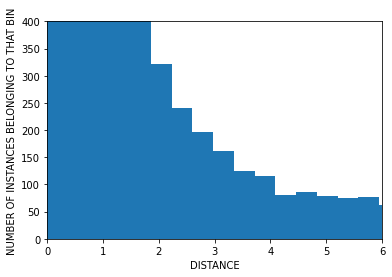

<Figure size 432x288 with 0 Axes>

In [9]:

uncertainty_distance_2 = np.array([0])

for imgs, labels in ds_train:
    uncertainty_distance_2 = np.append(uncertainty_distance_2, tf.make_ndarray(tf.make_tensor_proto(distance_obj.get_uncertainty(imgs))), axis = 0)
    print(len(uncertainty_distance_2))

uncertainty_distance_2 = uncertainty_distance_2[np.isfinite(uncertainty_distance_2)]
plt.hist(uncertainty_distance_2, bins = 1000)
plt.xlabel('DISTANCE')
plt.ylabel('NUMBER OF INSTANCES BELONGING TO THAT BIN')
plt.xlim(0, 6)
plt.ylim(0, 400)
plt.show()
plt.savefig('cifar100_train_unc_distance_2.png')


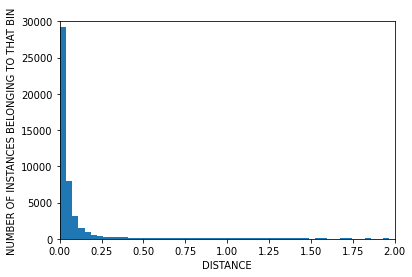

<Figure size 432x288 with 0 Axes>

In [10]:
plt.hist(uncertainty_distance_2, bins = 10000)
plt.xlabel('DISTANCE')
plt.ylabel('NUMBER OF INSTANCES BELONGING TO THAT BIN')
plt.xlim(0, 2)
plt.ylim(0, 30000)
plt.show()
plt.savefig('cifar100_train_unc_distance_1.png')

17
33
49
65
81
97
113
129
145
161
177
193
209
225
241
257
273
289
305
321
337
353
369
385
401
417
433
449
465
481
497
513
529
545
561
577
593
609
625
641
657
673
689
705
721
737
753
769
785
801
817
833
849
865
881
897
913
929
945
961
977
993
1009
1025
1041
1057
1073
1089
1105
1121
1137
1153
1169
1185
1201
1217
1233
1249
1265
1281
1297
1313
1329
1345
1361
1377
1393
1409
1425
1441
1457
1473
1489
1505
1521
1537
1553
1569
1585
1601
1617
1633
1649
1665
1681
1697
1713
1729
1745
1761
1777
1793
1809
1825
1841
1857
1873
1889
1905
1921
1937
1953
1969
1985
2001
2017
2033
2049
2065
2081
2097
2113
2129
2145
2161
2177
2193
2209
2225
2241
2257
2273
2289
2305
2321
2337
2353
2369
2385
2401
2417
2433
2449
2465
2481
2497
2513
2529
2545
2561
2577
2593
2609
2625
2641
2657
2673
2689
2705
2721
2737
2753
2769
2785
2801
2817
2833
2849
2865
2881
2897
2913
2929
2945
2961
2977
2993
3009
3025
3041
3057
3073
3089
3105
3121
3137
3153
3169
3185
3201
3217
3233
3249
3265
3281
3297
3313
3329
3345
3361
3377
3393
3409
342

23713
23729
23745
23761
23777
23793
23809
23825
23841
23857
23873
23889
23905
23921
23937
23953
23969
23985
24001
24017
24033
24049
24065
24081
24097
24113
24129
24145
24161
24177
24193
24209
24225
24241
24257
24273
24289
24305
24321
24337
24353
24369
24385
24401
24417
24433
24449
24465
24481
24497
24513
24529
24545
24561
24577
24593
24609
24625
24641
24657
24673
24689
24705
24721
24737
24753
24769
24785
24801
24817
24833
24849
24865
24881
24897
24913
24929
24945
24961
24977
24993
25009
25025
25041
25057
25073
25089
25105
25121
25137
25153
25169
25185
25201
25217
25233
25249
25265
25281
25297
25313
25329
25345
25361
25377
25393
25409
25425
25441
25457
25473
25489
25505
25521
25537
25553
25569
25585
25601
25617
25633
25649
25665
25681
25697
25713
25729
25745
25761
25777
25793
25809
25825
25841
25857
25873
25889
25905
25921
25937
25953
25969
25985
26001
26017
26033
26049
26065
26081
26097
26113
26129
26145
26161
26177
26193
26209
26225
26241
26257
26273
26289
26305
26321
26337
26353
2636

45569
45585
45601
45617
45633
45649
45665
45681
45697
45713
45729
45745
45761
45777
45793
45809
45825
45841
45857
45873
45889
45905
45921
45937
45953
45969
45985
46001
46017
46033
46049
46065
46081
46097
46113
46129
46145
46161
46177
46193
46209
46225
46241
46257
46273
46289
46305
46321
46337
46353
46369
46385
46401
46417
46433
46449
46465
46481
46497
46513
46529
46545
46561
46577
46593
46609
46625
46641
46657
46673
46689
46705
46721
46737
46753
46769
46785
46801
46817
46833
46849
46865
46881
46897
46913
46929
46945
46961
46977
46993
47009
47025
47041
47057
47073
47089
47105
47121
47137
47153
47169
47185
47201
47217
47233
47249
47265
47281
47297
47313
47329
47345
47361
47377
47393
47409
47425
47441
47457
47473
47489
47505
47521
47537
47553
47569
47585
47601
47617
47633
47649
47665
47681
47697
47713
47729
47745
47761
47777
47793
47809
47825
47841
47857
47873
47889
47905
47921
47937
47953
47969
47985
48001
48017
48033
48049
48065
48081
48097
48113
48129
48145
48161
48177
48193
48209
4822

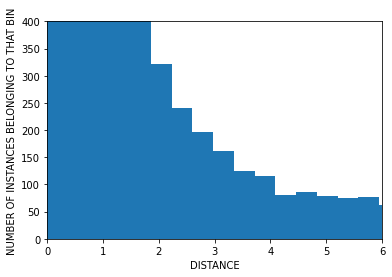

<Figure size 432x288 with 0 Axes>

In [11]:

uncertainty_distance_3 = np.array([0])

for imgs, labels in ds_train:
    uncertainty_distance_3 = np.append(uncertainty_distance_3, tf.make_ndarray(tf.make_tensor_proto(distance_obj.get_uncertainty(imgs))), axis = 0)
    print(len(uncertainty_distance_3))

uncertainty_distance_3 = uncertainty_distance_3[np.isfinite(uncertainty_distance_3)]
plt.hist(uncertainty_distance_3, bins = 1000)
plt.xlabel('DISTANCE')
plt.ylabel('NUMBER OF INSTANCES BELONGING TO THAT BIN')
plt.xlim(0, 6)
plt.ylim(0, 400)
plt.show()
plt.savefig('cifar100_train_unc_distance_3.png')


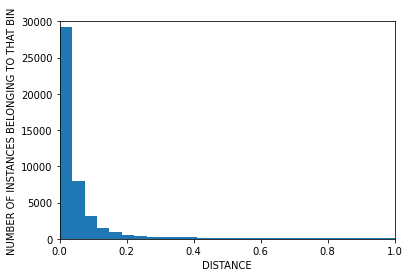

<Figure size 432x288 with 0 Axes>

In [12]:
plt.hist(uncertainty_distance_2, bins = 10000)
plt.xlabel('DISTANCE')
plt.ylabel('NUMBER OF INSTANCES BELONGING TO THAT BIN')
plt.xlim(0, 1)
plt.ylim(0, 30000)
plt.show()
plt.savefig('cifar100_train_unc_distance_1.png')

17
33
49
65
81
97
113
129
145
161
177
193
209
225
241
257
273
289
305
321
337
353
369
385
401
417
433
449
465
481
497
513
529
545
561
577
593
609
625
641
657
673
689
705
721
737
753
769
785
801
817
833
849
865
881
897
913
929
945
961
977
993
1009
1025
1041
1057
1073
1089
1105
1121
1137
1153
1169
1185
1201
1217
1233
1249
1265
1281
1297
1313
1329
1345
1361
1377
1393
1409
1425
1441
1457
1473
1489
1505
1521
1537
1553
1569
1585
1601
1617
1633
1649
1665
1681
1697
1713
1729
1745
1761
1777
1793
1809
1825
1841
1857
1873
1889
1905
1921
1937
1953
1969
1985
2001
2017
2033
2049
2065
2081
2097
2113
2129
2145
2161
2177
2193
2209
2225
2241
2257
2273
2289
2305
2321
2337
2353
2369
2385
2401
2417
2433
2449
2465
2481
2497
2513
2529
2545
2561
2577
2593
2609
2625
2641
2657
2673
2689
2705
2721
2737
2753
2769
2785
2801
2817
2833
2849
2865
2881
2897
2913
2929
2945
2961
2977
2993
3009
3025
3041
3057
3073
3089
3105
3121
3137
3153
3169
3185
3201
3217
3233
3249
3265
3281
3297
3313
3329
3345
3361
3377
3393
3409
342

23713
23729
23745
23761
23777
23793
23809
23825
23841
23857
23873
23889
23905
23921
23937
23953
23969
23985
24001
24017
24033
24049
24065
24081
24097
24113
24129
24145
24161
24177
24193
24209
24225
24241
24257
24273
24289
24305
24321
24337
24353
24369
24385
24401
24417
24433
24449
24465
24481
24497
24513
24529
24545
24561
24577
24593
24609
24625
24641
24657
24673
24689
24705
24721
24737
24753
24769
24785
24801
24817
24833
24849
24865
24881
24897
24913
24929
24945
24961
24977
24993
25009
25025
25041
25057
25073
25089
25105
25121
25137
25153
25169
25185
25201
25217
25233
25249
25265
25281
25297
25313
25329
25345
25361
25377
25393
25409
25425
25441
25457
25473
25489
25505
25521
25537
25553
25569
25585
25601
25617
25633
25649
25665
25681
25697
25713
25729
25745
25761
25777
25793
25809
25825
25841
25857
25873
25889
25905
25921
25937
25953
25969
25985
26001
26017
26033
26049
26065
26081
26097
26113
26129
26145
26161
26177
26193
26209
26225
26241
26257
26273
26289
26305
26321
26337
26353
2636

45569
45585
45601
45617
45633
45649
45665
45681
45697
45713
45729
45745
45761
45777
45793
45809
45825
45841
45857
45873
45889
45905
45921
45937
45953
45969
45985
46001
46017
46033
46049
46065
46081
46097
46113
46129
46145
46161
46177
46193
46209
46225
46241
46257
46273
46289
46305
46321
46337
46353
46369
46385
46401
46417
46433
46449
46465
46481
46497
46513
46529
46545
46561
46577
46593
46609
46625
46641
46657
46673
46689
46705
46721
46737
46753
46769
46785
46801
46817
46833
46849
46865
46881
46897
46913
46929
46945
46961
46977
46993
47009
47025
47041
47057
47073
47089
47105
47121
47137
47153
47169
47185
47201
47217
47233
47249
47265
47281
47297
47313
47329
47345
47361
47377
47393
47409
47425
47441
47457
47473
47489
47505
47521
47537
47553
47569
47585
47601
47617
47633
47649
47665
47681
47697
47713
47729
47745
47761
47777
47793
47809
47825
47841
47857
47873
47889
47905
47921
47937
47953
47969
47985
48001
48017
48033
48049
48065
48081
48097
48113
48129
48145
48161
48177
48193
48209
4822

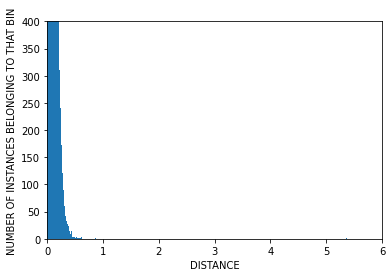

<Figure size 432x288 with 0 Axes>

In [13]:
### random uniform sampling
uncertainty_distance_r1 = np.array([0])

for imgs, labels in ds_train:
    uncertainty_distance_r1 = np.append(uncertainty_distance_r1, tf.make_ndarray(tf.make_tensor_proto(distance_obj.get_uncertainty(tf.random.uniform([16, 32, 32, 3], minval = 0, maxval = 1)))), axis = 0)
    print(len(uncertainty_distance_r1))

uncertainty_distance_r1 = uncertainty_distance_r1[np.isfinite(uncertainty_distance_r1)]
plt.hist(uncertainty_distance_r1, bins = 1000)
plt.xlabel('DISTANCE')
plt.ylabel('NUMBER OF INSTANCES BELONGING TO THAT BIN')
plt.xlim(0, 6)
plt.ylim(0, 400)
plt.show()
plt.savefig('cifar100_uniform_unc_distance_1.png')


17
33
49
65
81
97
113
129
145
161
177
193
209
225
241
257
273
289
305
321
337
353
369
385
401
417
433
449
465
481
497
513
529
545
561
577
593
609
625
641
657
673
689
705
721
737
753
769
785
801
817
833
849
865
881
897
913
929
945
961
977
993
1009
1025
1041
1057
1073
1089
1105
1121
1137
1153
1169
1185
1201
1217
1233
1249
1265
1281
1297
1313
1329
1345
1361
1377
1393
1409
1425
1441
1457
1473
1489
1505
1521
1537
1553
1569
1585
1601
1617
1633
1649
1665
1681
1697
1713
1729
1745
1761
1777
1793
1809
1825
1841
1857
1873
1889
1905
1921
1937
1953
1969
1985
2001
2017
2033
2049
2065
2081
2097
2113
2129
2145
2161
2177
2193
2209
2225
2241
2257
2273
2289
2305
2321
2337
2353
2369
2385
2401
2417
2433
2449
2465
2481
2497
2513
2529
2545
2561
2577
2593
2609
2625
2641
2657
2673
2689
2705
2721
2737
2753
2769
2785
2801
2817
2833
2849
2865
2881
2897
2913
2929
2945
2961
2977
2993
3009
3025
3041
3057
3073
3089
3105
3121
3137
3153
3169
3185
3201
3217
3233
3249
3265
3281
3297
3313
3329
3345
3361
3377
3393
3409
342

23713
23729
23745
23761
23777
23793
23809
23825
23841
23857
23873
23889
23905
23921
23937
23953
23969
23985
24001
24017
24033
24049
24065
24081
24097
24113
24129
24145
24161
24177
24193
24209
24225
24241
24257
24273
24289
24305
24321
24337
24353
24369
24385
24401
24417
24433
24449
24465
24481
24497
24513
24529
24545
24561
24577
24593
24609
24625
24641
24657
24673
24689
24705
24721
24737
24753
24769
24785
24801
24817
24833
24849
24865
24881
24897
24913
24929
24945
24961
24977
24993
25009
25025
25041
25057
25073
25089
25105
25121
25137
25153
25169
25185
25201
25217
25233
25249
25265
25281
25297
25313
25329
25345
25361
25377
25393
25409
25425
25441
25457
25473
25489
25505
25521
25537
25553
25569
25585
25601
25617
25633
25649
25665
25681
25697
25713
25729
25745
25761
25777
25793
25809
25825
25841
25857
25873
25889
25905
25921
25937
25953
25969
25985
26001
26017
26033
26049
26065
26081
26097
26113
26129
26145
26161
26177
26193
26209
26225
26241
26257
26273
26289
26305
26321
26337
26353
2636

45569
45585
45601
45617
45633
45649
45665
45681
45697
45713
45729
45745
45761
45777
45793
45809
45825
45841
45857
45873
45889
45905
45921
45937
45953
45969
45985
46001
46017
46033
46049
46065
46081
46097
46113
46129
46145
46161
46177
46193
46209
46225
46241
46257
46273
46289
46305
46321
46337
46353
46369
46385
46401
46417
46433
46449
46465
46481
46497
46513
46529
46545
46561
46577
46593
46609
46625
46641
46657
46673
46689
46705
46721
46737
46753
46769
46785
46801
46817
46833
46849
46865
46881
46897
46913
46929
46945
46961
46977
46993
47009
47025
47041
47057
47073
47089
47105
47121
47137
47153
47169
47185
47201
47217
47233
47249
47265
47281
47297
47313
47329
47345
47361
47377
47393
47409
47425
47441
47457
47473
47489
47505
47521
47537
47553
47569
47585
47601
47617
47633
47649
47665
47681
47697
47713
47729
47745
47761
47777
47793
47809
47825
47841
47857
47873
47889
47905
47921
47937
47953
47969
47985
48001
48017
48033
48049
48065
48081
48097
48113
48129
48145
48161
48177
48193
48209
4822

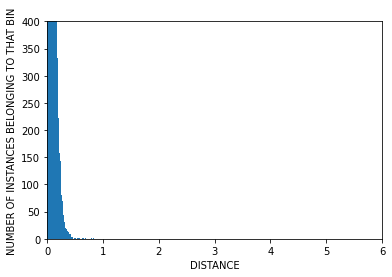

<Figure size 432x288 with 0 Axes>

In [14]:
### random uniform sampling
uncertainty_distance_r2 = np.array([0])

for imgs, labels in ds_train:
    uncertainty_distance_r2 = np.append(uncertainty_distance_r2, tf.make_ndarray(tf.make_tensor_proto(distance_obj.get_uncertainty(tf.random.uniform([16, 32, 32, 3], minval = 0, maxval = 1)))), axis = 0)
    print(len(uncertainty_distance_r2))

uncertainty_distance_r2 = uncertainty_distance_r2[np.isfinite(uncertainty_distance_r2)]
plt.hist(uncertainty_distance_r2, bins = 1000)
plt.xlabel('DISTANCE')
plt.ylabel('NUMBER OF INSTANCES BELONGING TO THAT BIN')
plt.xlim(0, 6)
plt.ylim(0, 400)
plt.show()
plt.savefig('cifar100_uniform_unc_distance_2.png')


In [ ]:
### random uniform sampling
uncertainty_distance_r3 = np.array([0])

for imgs, labels in ds_train:
    uncertainty_distance_r3 = np.append(uncertainty_distance_r3, tf.make_ndarray(tf.make_tensor_proto(distance_obj.get_uncertainty(tf.random.uniform([16, 32, 32, 3], minval = 0, maxval = 1)))), axis = 0)
    print(len(uncertainty_distance_r3))

uncertainty_distance_r3 = uncertainty_distance_r3[np.isfinite(uncertainty_distance_r3)]
plt.hist(uncertainty_distance_r3, bins = 1000)
plt.xlabel('DISTANCE')
plt.ylabel('NUMBER OF INSTANCES BELONGING TO THAT BIN')
plt.xlim(0, 6)
plt.ylim(0, 400)
plt.show()
plt.savefig('cifar100_uniform_unc_distance_3.png')


17
33
49
65
81
97
113
129
145
161
177
193
209
225
241
257
273
289
305
321
337
353
369
385
401
417
433
449
465
481
497
513
529
545
561
577
593
609
625
641
657
673
689
705
721
737
753
769
785
801
817
833
849
865
881
897
913
929
945
961
977
993
1009
1025
1041
1057
1073
1089
1105
1121
1137
1153
1169
1185
1201
1217
1233
1249
1265
1281
1297
1313
1329
1345
1361
1377
1393
1409
1425
1441
1457
1473
1489
1505
1521
1537
1553
1569
1585
1601
1617
1633
1649
1665
1681
1697
1713
1729
1745
1761
1777
1793
1809
1825
1841
1857
1873
1889
1905
1921
1937
1953
1969
1985
2001
2017
2033
2049
2065
2081
2097
2113
2129
2145
2161
2177
2193
2209
2225
2241
2257
2273
2289
2305
2321
2337
2353
2369
2385
2401
2417
2433
2449
2465
2481
2497
2513
2529
2545
2561
2577
2593
2609
2625
2641
2657
2673
2689
2705
2721
2737
2753
2769
2785
2801
2817
2833
2849
2865
2881
2897
2913
2929
2945
2961
2977
2993
3009
3025
3041
3057
3073
3089
3105
3121
3137
3153
3169
3185
3201
3217
3233
3249
3265
3281
3297
3313
3329
3345
3361
3377
3393
3409
342